# Data availability

In [1]:
#imports

import xarray as xr
import datetime
import cmath
from datetime import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.dates as pldates
import numpy as np
import scipy.signal as sig
import scipy.integrate as integ
import scipy.interpolate as interp
import pandas as pd
import seawater as sea
from scipy.stats import chi2
from scipy.io import loadmat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

In [2]:
# list dates for each instrument

inst_list = ['Axis_75_23064','Axis_75_23065','Axis_55_22925','Axis_55_24420','Slope_75_12108','Slope_75_23065']
site_list = ['Axis','Slope']

axis75_23064 = ['2012-06-02','2014-05-05']
axis75_23064_d = datetime.strptime(axis75_23064[0], '%Y-%m-%d')
axis75_23064_r = datetime.strptime(axis75_23064[1], '%Y-%m-%d')
axis75_23064 = np.array([axis75_23064_d,axis75_23064_r])

axis75_23065 = ['2014-05-08','2015-09-17','2016-06-14','2018-06-22']
axis75_23065_d1 = datetime.strptime(axis75_23065[0], '%Y-%m-%d')
axis75_23065_r1 = datetime.strptime(axis75_23065[1], '%Y-%m-%d')
axis75_23065_d2 = datetime.strptime(axis75_23065[2], '%Y-%m-%d')
axis75_23065_r2 = datetime.strptime(axis75_23065[3], '%Y-%m-%d')
axis75_23065 = np.array([axis75_23065_d1,axis75_23065_r1,axis75_23065_d2,axis75_23065_r2])

axis75_23065_gaps = ['2015-01-15','2015-09-17','2017-08-10','2017-11-02']
gaps_23065 = []
for i in range(len(axis75_23065_gaps)):
    gaps_23065_temp = datetime.strptime(axis75_23065_gaps[i], '%Y-%m-%d')
    gaps_23065.append(gaps_23065_temp)

axis55_22925 = ['2016-06-14','2018-06-22']
axis55_22925_d = datetime.strptime(axis55_22925[0], '%Y-%m-%d')
axis55_22925_r = datetime.strptime(axis55_22925[1], '%Y-%m-%d')
axis55_22925 = np.array([axis55_22925_d,axis55_22925_r])

axis55_22925_gaps = ['2016-06-14','2017-01-18']
gaps_22925 = []
for i in range(len(axis55_22925_gaps)):
    gaps_22925_temp = datetime.strptime(axis55_22925_gaps[i], '%Y-%m-%d')
    gaps_22925.append(gaps_22925_temp)

axis55_24420 = ['2018-06-22','2020-06-01']
axis55_24420_d = datetime.strptime(axis55_24420[0], '%Y-%m-%d')
axis55_24420_r = datetime.strptime(axis55_24420[1], '%Y-%m-%d')
axis55_24420 = np.array([axis55_24420_d,axis55_24420_r])

axis55_24420_gaps = ['2019-12-25','2020-06-01']
gaps_24420 = []
for i in range(len(axis55_24420_gaps)):
    gaps_24420_temp = datetime.strptime(axis55_24420_gaps[i], '%Y-%m-%d')
    gaps_24420.append(gaps_24420_temp)

slope75_12108 = ['2009-07-26','2019-05-16']
slope75_12108_d = datetime.strptime(slope75_12108[0], '%Y-%m-%d')
slope75_12108_r = datetime.strptime(slope75_12108[1], '%Y-%m-%d')
slope75_12108 = np.array([slope75_12108_d,slope75_12108_r])

slope75_12108_gaps = ['2010-05-12','2010-06-30','2011-02-20','2012-05-29','2015-01-01','2016-06-08','2018-11-23','2019-05-16']
gaps_12108 = []
for i in range(len(slope75_12108_gaps)):
    gaps_12108_temp = datetime.strptime(slope75_12108_gaps[i], '%Y-%m-%d')
    gaps_12108.append(gaps_12108_temp)

slope75_23065 = ['2019-08-26','2020-06-01']
slope75_23065_d = datetime.strptime(slope75_23065[0], '%Y-%m-%d')
slope75_23065_r = datetime.strptime(slope75_23065[1], '%Y-%m-%d')
slope75_23065 = np.array([slope75_23065_d,slope75_23065_r])

compare = ['2013-01-01','2014-12-31','2017-01-01','2018-12-31']
compare_d1 = datetime.strptime(compare[0], '%Y-%m-%d')
compare_r1 = datetime.strptime(compare[1], '%Y-%m-%d')
compare_d2 = datetime.strptime(compare[2], '%Y-%m-%d')
compare_r2 = datetime.strptime(compare[3], '%Y-%m-%d')
compare = np.array([compare_d1,compare_r1,compare_d2,compare_r2])

date_range = ['2009-05-26','2020-08-01']
date_range_d1 = datetime.strptime(date_range[0], '%Y-%m-%d')
date_range_r1 = datetime.strptime(date_range[1], '%Y-%m-%d')

<IPython.core.display.Javascript object>


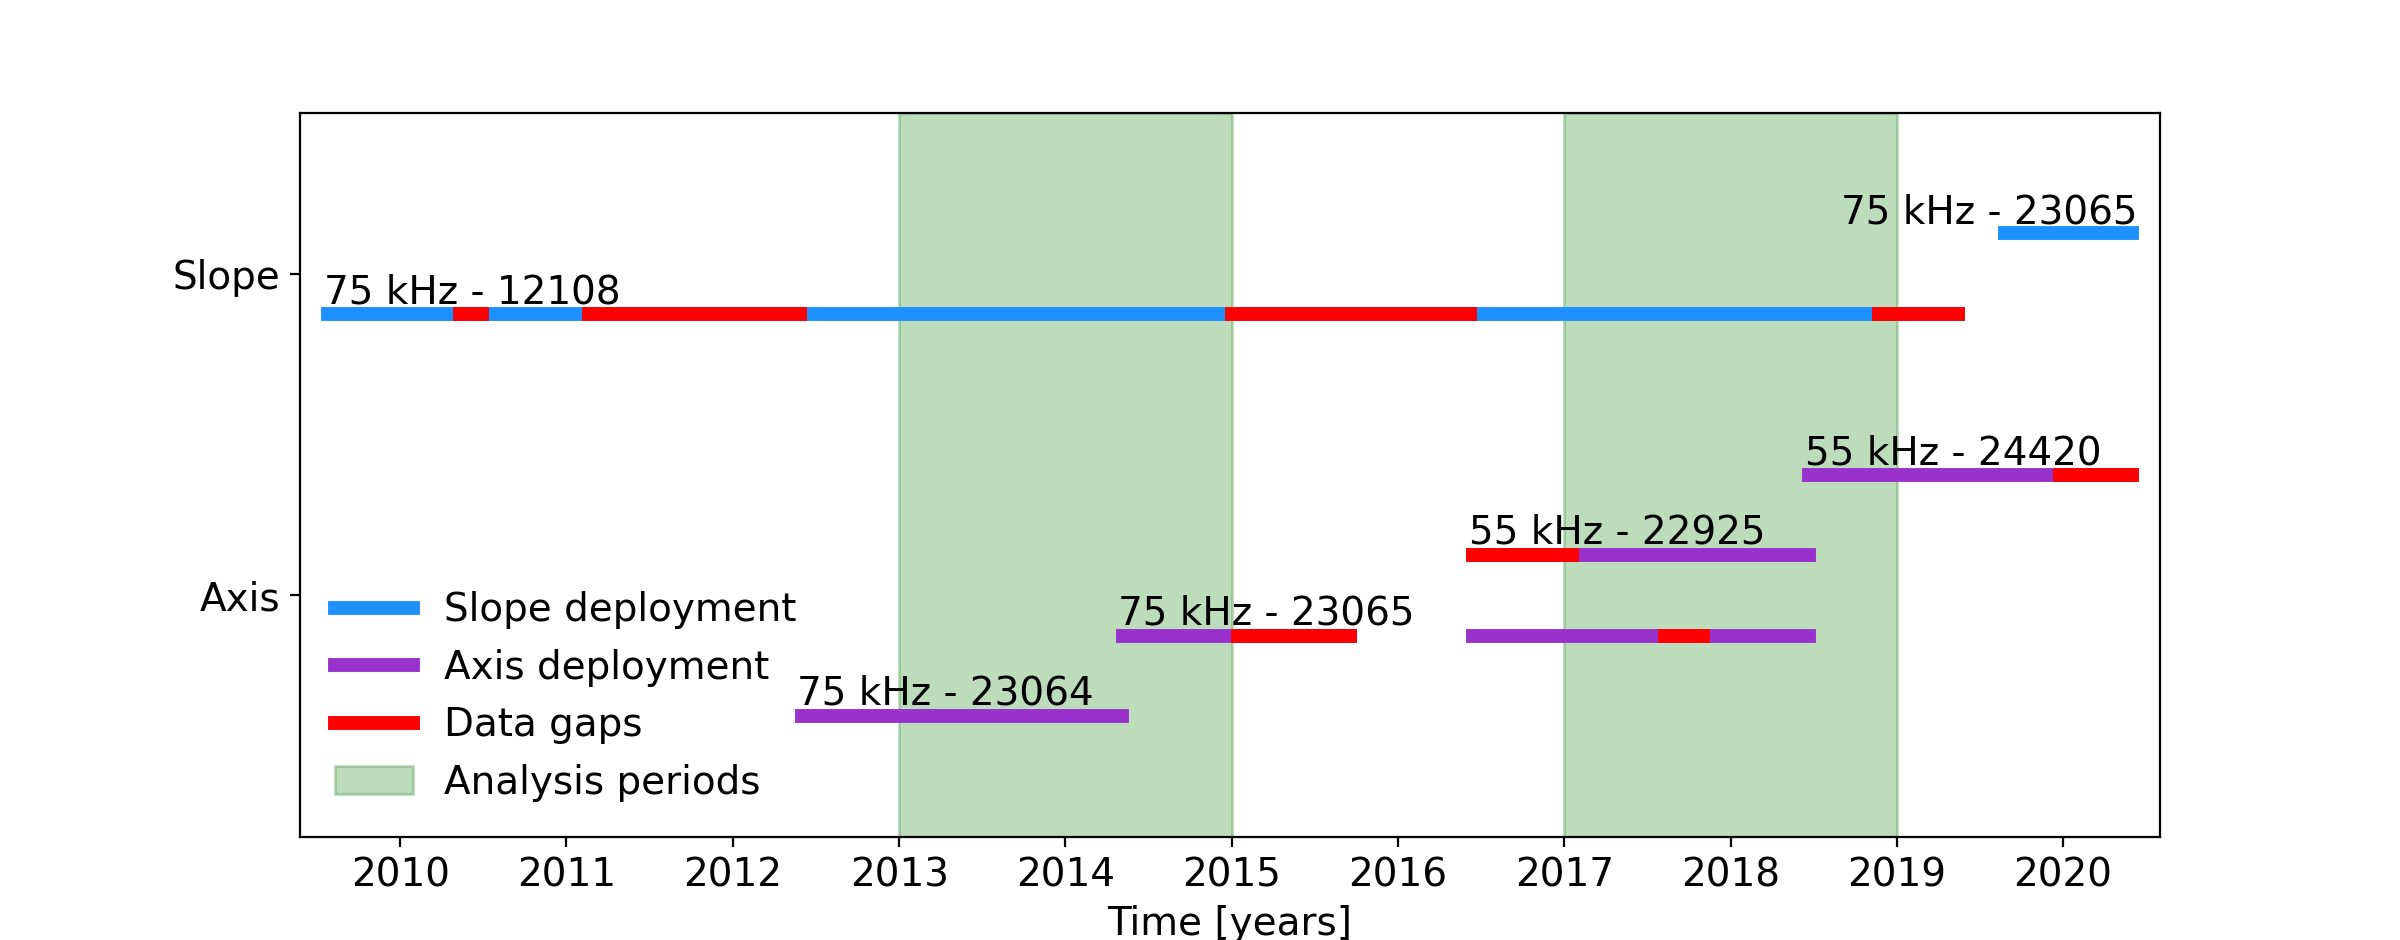

In [14]:
# plot data availability

fig,ax = plt.subplots(figsize=(12,4.7))

ax.set_xlabel('Time [years]',fontsize=14)
#ax.set_title('Instrument deployment and data availability',fontsize=14)
ax.set_yticks(ticks=[2,4])
ax.set_yticklabels(site_list)
ax.set_ylim(0.5,5)
date_form = pldates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlim(date_range_d1,date_range_r1)
ax.set_xticks(ticks=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'])
fig.text(0.767, 0.774, '75 kHz - 23065', va='center',fontsize=14,c='black')
fig.text(0.135, 0.689, '75 kHz - 12108', va='center',fontsize=14,c='black')
fig.text(0.752, 0.518, '55 kHz - 24420', va='center',fontsize=14,c='black')
fig.text(0.612, 0.433, '55 kHz - 22925', va='center',fontsize=14,c='black')
fig.text(0.466, 0.347, '75 kHz - 23065', va='center',fontsize=14,c='black')
fig.text(0.332, 0.262, '75 kHz - 23064', va='center',fontsize=14,c='black')

lw = 5

ax.fill_betweenx([0.5,5],'2013','2015',color='forestgreen',alpha=0.3,label='Analysis periods')
ax.fill_betweenx([0.5,5],'2017','2019',color='forestgreen',alpha=0.3)

ax.plot(slope75_23065,[4.25,4.25],color='dodgerblue',lw=lw,label='Slope deployment')

ax.plot(slope75_12108,[3.75,3.75],color='dodgerblue',lw=lw)
for i in range(len(gaps_12108)):
    if i%2 == 0 and i < (len(gaps_12108)-1):
        ax.plot([gaps_12108[i],gaps_12108[i+1]],[3.75,3.75],color='red',lw=lw)
        
ax.plot(axis55_24420,[2.75,2.75],color='darkorchid',lw=lw)
for i in range(len(gaps_24420)):
    if i%2 == 0 and i < (len(gaps_24420)-1):
        ax.plot([gaps_24420[i],gaps_24420[i+1]],[2.75,2.75],color='red',lw=lw)

ax.plot(axis55_22925,[2.25,2.25],color='darkorchid',lw=lw,label='Axis deployment')
for i in range(len(gaps_22925)):
    if i%2 == 0 and i < (len(gaps_22925)-1):
        ax.plot([gaps_22925[i],gaps_22925[i+1]],[2.25,2.25],color='red',lw=lw,label='Data gaps')

ax.plot([axis75_23065[0],axis75_23065[1]],[1.75,1.75],color='darkorchid',lw=lw)
ax.plot([axis75_23065[2],axis75_23065[3]],[1.75,1.75],color='darkorchid',lw=lw)
for i in range(len(gaps_23065)):
    if i%2 == 0 and i < (len(gaps_23065)-1):
        ax.plot([gaps_23065[i],gaps_23065[i+1]],[1.75,1.75],color='red',lw=lw)

ax.plot(axis75_23064,[1.25,1.25],color='darkorchid',lw=lw)
#ax.patch.set_facecolor('darkgrey')

leg = ax.legend(loc='lower left',frameon=False, fontsize=14)
for text in leg.get_texts():
    text.set_color("black")
    
ax.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./deployment.pdf',format='pdf')